0.06783340116673449


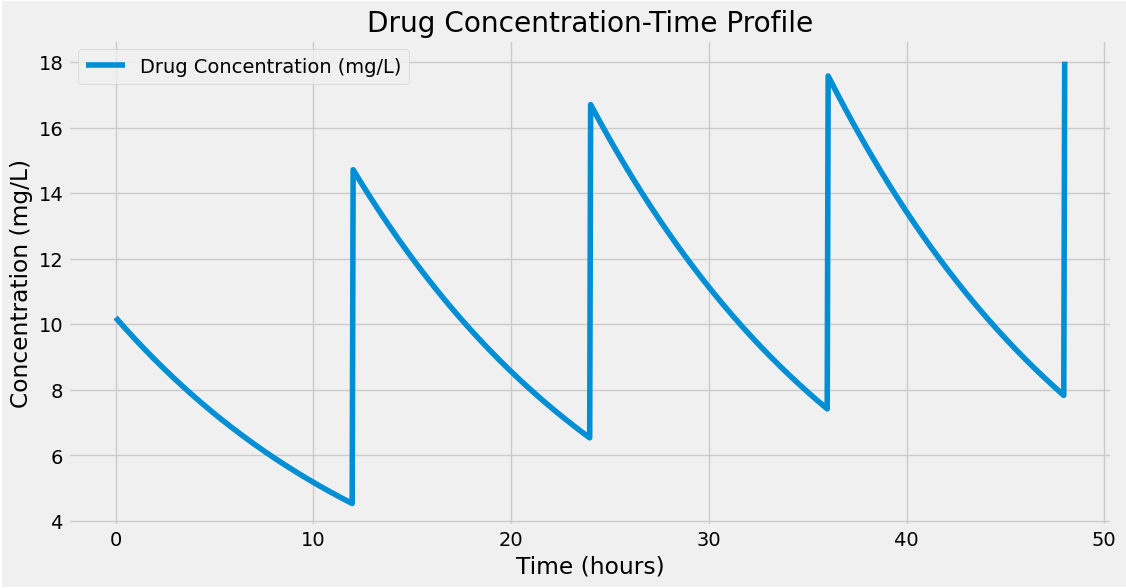

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
D = 500  # Dose in mg
V = 49  # Volume of distribution in L
t_half = 6  # Half-life in hours
tau = 12  # Dosing interval in hours

# Calculated parameters
#Ke = np.log(2) / t_half  # Elimination rate constant
#CL = V * k  # Clearance
#Buelga 2005
def Ke(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)
    Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
    Kel = (Vanco_CL/V)#hr-1
    return Kel
    
    
Ke = Ke(1.3, 60, 70)  
print(Ke)
# Time array
t_max = 48  # time point when sim ends
time = np.linspace(0, t_max, 1000)

# Function to calculate concentration at any time t
def concentration(t, D, V, Ke, tau):
    conc = np.zeros_like(t)
    for i, time_point in enumerate(t):
        for n in range(int(time_point // tau) + 1):
            conc[i] += (D / V) * np.exp(-Ke * (time_point - n * tau))
    return conc

# Calculate concentration over time
conc = concentration(time, D, V, Ke, tau)

# Plot the concentration-time profile
#plt.rcParams['lines.linewidth'] = 1
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6), linewidth = 1.0)
ax.plot(time, conc, label='Drug Concentration (mg/L)')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Concentration (mg/L)')
ax.set_title('Drug Concentration-Time Profile')
plt.legend()
plt.grid(True)




In [15]:
print(conc)

[10.20408163 10.17087799 10.13778239 10.10479449 10.07191392 10.03914035
 10.00647342  9.97391278  9.9414581   9.90910903  9.87686521  9.84472632
  9.812692    9.78076193  9.74893575  9.71721313  9.68559374  9.65407723
  9.62266328  9.59135155  9.56014171  9.52903342  9.49802635  9.46712019
  9.43631459  9.40560922  9.37500378  9.34449792  9.31409133  9.28378367
  9.25357464  9.22346391  9.19345116  9.16353606  9.13371831  9.10399759
  9.07437357  9.04484595  9.01541441  8.98607864  8.95683833  8.92769316
  8.89864283  8.86968703  8.84082545  8.81205779  8.78338373  8.75480298
  8.72631523  8.69792018  8.66961752  8.64140696  8.61328819  8.58526092
  8.55732485  8.52947969  8.50172513  8.47406088  8.44648665  8.41900215
  8.39160708  8.36430115  8.33708408  8.30995556  8.28291533  8.25596308
  8.22909853  8.2023214   8.1756314   8.14902825  8.12251166  8.09608136
  8.06973706  8.04347848  8.01730535  7.99121738  7.96521431  7.93929584
  7.91346172  7.88771165  7.86204538  7.83646262  7

In [ ]:
# ODE system parameters
rho = 0.10
k = 10
#linezolid, 
#0.0833, invitro activity linezolid alone
#0.0958 - 0.1458, invitro activity linezolid alone

#vancomycin
#0.0958 - 0.1458
#0.1 - 0.1125
#0.1 - 0.1208
#0.166
#0.208
#0.625
#death rate of vancomycin resistant bacteria: 0.1222
delta = 0.1125
S = 20
R = 20
r = [S, R]
EC_50 = 30

# System ODE
def system_ode(t, r):
    S = r[0]
    R = r[1]
    conc_t = np.interp(t, time, conc)
    dSdt = (1 - (conc_t / (conc_t + EC_50)) * rho * (1 - (S + R) / k)) - delta * S
    dRdt = rho * R * (1 - (S + R) / k) - delta * R
    return [dSdt, dRdt]

ode_soln = solve_ivp(system_ode, t_span=[0, t_max], y0=[2, 2], t_eval=time)



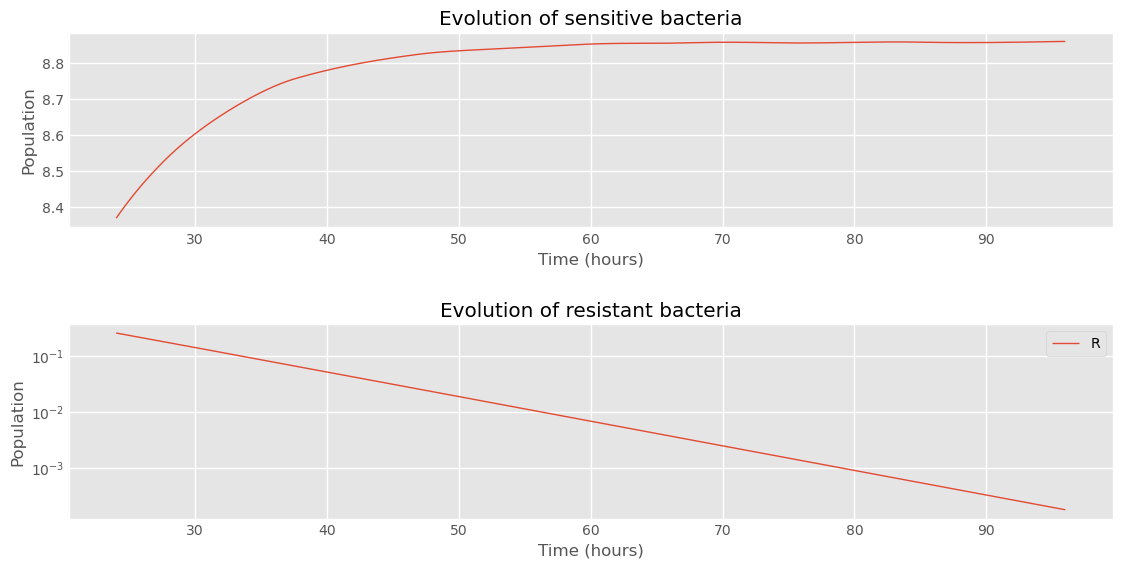

In [23]:
# Plot the ODE solution
plt.rcParams['lines.linewidth'] = 1
plt.style.use('ggplot')
fig, ax = plt.subplots(2, figsize=(12, 6))

plt.yscale("log")
ax[0].plot(ode_soln.t, ode_soln.y[0], label='S')
ax[1].plot(ode_soln.t, ode_soln.y[1], label='R')
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Population')
ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Population')
ax[0].set_title('Evolution of sensitive bacteria')
ax[1].set_title('Evolution of resistant bacteria')
fig.subplots_adjust(hspace= 0.5, wspace=0.2)  # Adjust horizontal space between plots
plt.legend()
plt.grid(True)


## Calculating model parameters for vancomycin

In [57]:
def Ke(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)# ml/min
    Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
    Kel = (Vanco_CL)/(V)# hr-1
    return Kel
    
    
Ke = Ke(1.3, 60, 70)  
print(Ke)

0.06783340116673449


In [46]:
eCCr = (140 - 60)*70/(72*1.2)#mL/min
print(eCCr)

64.81481481481482


## Vancomycin CL from Buelga 2005

In [55]:
Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
print(Vanco_CL)

3.6008230452674903


In [32]:
t_half = 6  # Half-life in hours
#tau = 12  # Dosing interval in hours

# Calculated parameters
Ke = np.log(2) / t_half  # Elimination rate constant
new_Ke = Ke
print(new_Ke)

0.11552453009332421


In [48]:
Ke = 0.00083*eCCr + 0.0044
Ke

0.05819629629629631

- `def concentration(t, D, V, Ke, tau):` - This line defines a function named `concentration` that takes five parameters: `t` (time array), `D` (dose), `V` (volume of distribution), `Ke` (elimination rate constant), and `tau` (dosing interval).

- `conc = np.zeros_like(t)` - This line initializes an array `conc` with the same shape as the input time array `t`, filled with zeros.

- `for i, time_point in enumerate(t):` - This line iterates over the elements of the time array `t`, where `i` is the index and `time_point` is the value at that index.

- `for n in range(int(time_point // tau) + 1):` - This line iterates over the dosing intervals within the current time interval, where `n` represents the dosing interval index.

- `conc[i] += (D / V) * np.exp(-Ke * (time_point - n * tau))` - This line calculates the drug concentration at the current time point by adding the contribution from each dosing interval using the exponential decay model.

- `return conc` - This line returns the array `conc` containing the calculated drug concentrations over time.

The `concentration` function essentially computes the drug concentration over time based on the dosing regimen and elimination rate constant.




